import tensorflow as tf
import os


In [7]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

In [8]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\joths\Downloads\Concrete Crack Images for Classification")

Found 40000 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()


In [10]:
batch = data_iterator.next()

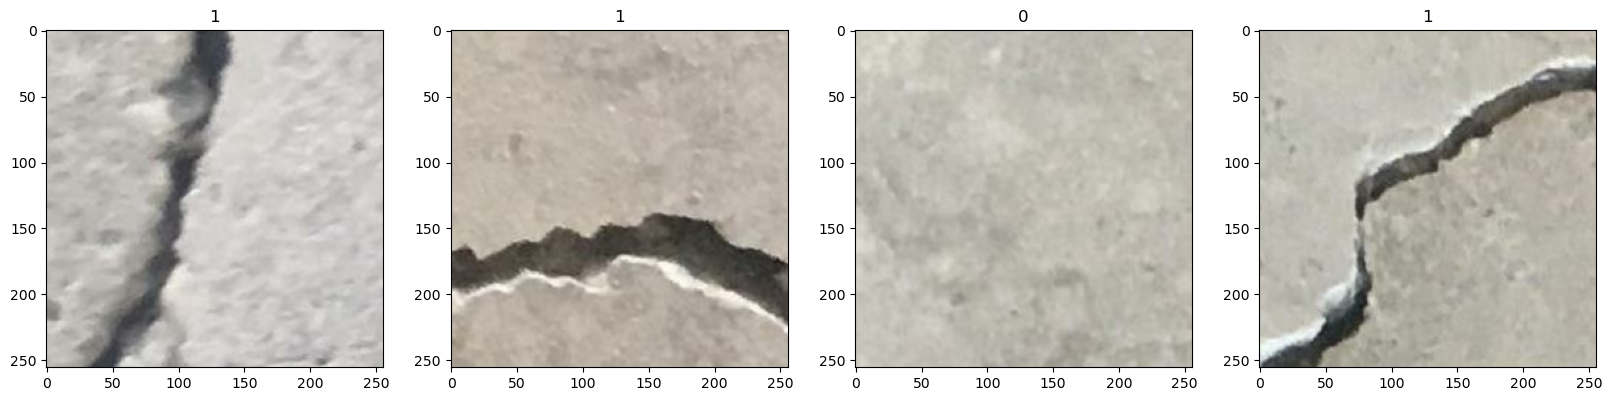

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x,y: (x/255, y))


In [13]:
data.as_numpy_iterator().next()

(array([[[[0.69803923, 0.6862745 , 0.6509804 ],
          [0.69803923, 0.6862745 , 0.6509804 ],
          [0.7008502 , 0.6890855 , 0.65379137],
          ...,
          [0.6414369 , 0.62967217, 0.6022212 ],
          [0.64839154, 0.63662684, 0.60917586],
          [0.654902  , 0.6431373 , 0.6156863 ]],
 
         [[0.6915288 , 0.6797641 , 0.64447   ],
          [0.6915288 , 0.6797641 , 0.64447   ],
          [0.69433975, 0.68257505, 0.64728093],
          ...,
          [0.6512025 , 0.6394378 , 0.6119868 ],
          [0.65815717, 0.64639246, 0.6189415 ],
          [0.6646676 , 0.6529029 , 0.6254519 ]],
 
         [[0.6845741 , 0.6728094 , 0.6375153 ],
          [0.6845741 , 0.6728094 , 0.6375153 ],
          [0.6873851 , 0.6756204 , 0.64032626],
          ...,
          [0.6785003 , 0.6667356 , 0.6392846 ],
          [0.68545496, 0.67369026, 0.6462393 ],
          [0.6919654 , 0.6802007 , 0.6527497 ]],
 
         ...,
 
         [[0.42405024, 0.41228554, 0.37699142],
          [0.42405

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(32, (3, 3), 1,activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 64


In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


875/875 [==============================] - 461s 526ms/step - loss: 0.2449 - accuracy: 0.9216 - val_loss: 0.0884 - val_accuracy: 0.9747
Epoch 2/10
875/875 [==============================] - 470s 536ms/step - loss: 0.1103 - accuracy: 0.9666 - val_loss: 0.0988 - val_accuracy: 0.9674
Epoch 3/10
875/875 [==============================] - 471s 539ms/step - loss: 0.0953 - accuracy: 0.9728 - val_loss: 0.0577 - val_accuracy: 0.9827
Epoch 4/10
875/875 [==============================] - 1753s 2s/step - loss: 0.0791 - accuracy: 0.9769 - val_loss: 0.1487 - val_accuracy: 0.9451
Epoch 5/10
875/875 [==============================] - 442s 505ms/step - loss: 0.0721 - accuracy: 0.9818 - val_loss: 0.0469 - val_accuracy: 0.9859
Epoch 6/10
875/875 [==============================] - 478s 546ms/step - loss: 0.0405 - accuracy: 0.9885 - val_loss: 0.0578 - val_accuracy: 0.9806
Epoch 7/10
875/875 [==============================] - 471s 538ms/step - loss: 0.0421 - accuracy: 0.9892 - val_loss: 0.0454 -

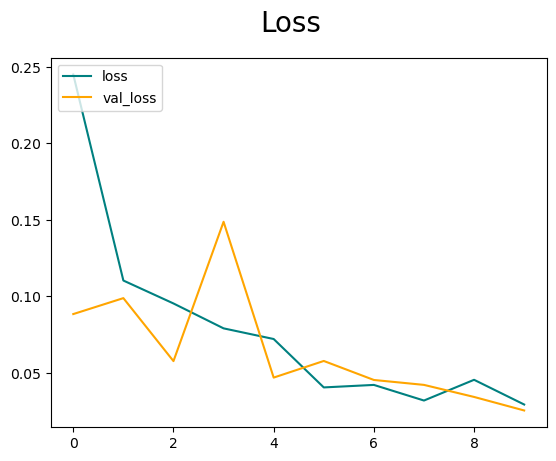

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

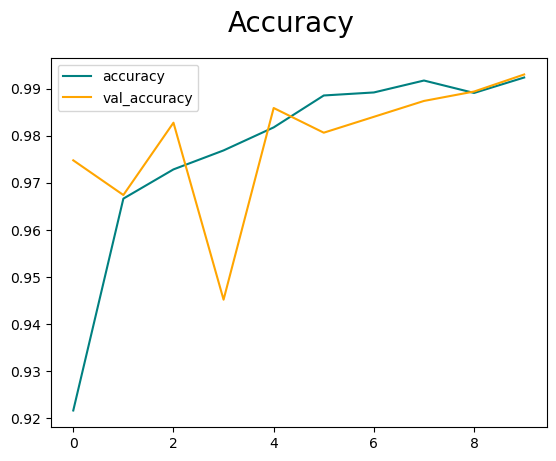

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 118ms/step


In [58]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.99458927, shape=(), dtype=float32) tf.Tensor(0.98843086, shape=(), dtype=float32) tf.Tensor(0.9913333, shape=(), dtype=float32)


In [59]:
import cv2

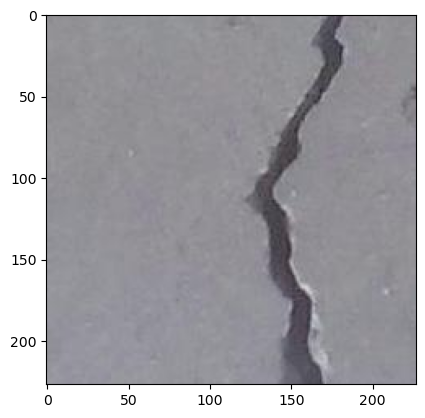

In [60]:
img = cv2.imread(r"C:\Users\joths\Downloads\Concrete Crack Images for Classification\Positive\00004.jpg")
plt.imshow(img)
plt.show()

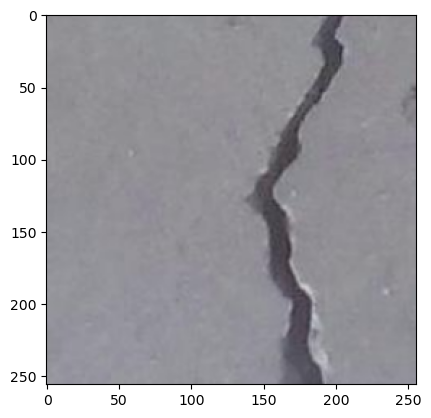

In [61]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 56ms/step


In [63]:
yhat

array([[0.9997503]], dtype=float32)

In [64]:
if yhat > 0.5: 
    print(f'Predicted class is  positive(has a crack)')
else:
    print(f'Predicted class is negative(doesnot have as crack)')

Predicted class is  positive(has a crack)
